<a href="https://colab.research.google.com/github/MazonSzymon/modelowanie_cen_akcji_spolek/blob/main/3_modele_szeregow_czasowych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr 
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
%load_ext google.colab.data_table

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Set up plot
from cycler import cycler
plt.style.use('ggplot')
plt.rc('axes', facecolor='white', edgecolor='black', grid = False, axisbelow = True)
plt.rc('grid',color='gray', linestyle='solid', linewidth=0.5)
plt.rc('patch', edgecolor='black')
plt.rc('legend', shadow=True, handlelength=1, fontsize=10, edgecolor = 'black', facecolor='white')

In [3]:
!git clone https://github.com/MazonSzymon/modelowanie_cen_akcji_spolek.git
import sys
sys.path.append('/content/modelowanie_cen_akcji_spolek/')

Cloning into 'modelowanie_cen_akcji_spolek'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 39 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (39/39), done.


In [4]:
our_stocks = pd.DataFrame(np.array([
                                    ['WI20','wig20.pl'],
                                    ['Alior Bank','alr.pl'],
                                    ['CD Projekt', 'cdr.pl'],
                                    ['Dino Polska', 'dnp.pl'],
                                    ['mBank', 'mbk.pl']
]), columns = ['Full_name','Stoq_name'])

def get_data(stock,start_date, end_date):
  stooq_data = pdr.get_data_stooq(stock['Stoq_name'], start = start_date, end = end_date).sort_index()
  stooq_data['Stock_name'] = stock['Full_name']
  df = stooq_data.copy()
  return df

def creat_WIG20_frame(start_date,end_date,stocks_list):
  WIG20 = pd.DataFrame()
  for i in range(len(stocks_list)):
    tmp = get_data(stocks_list.iloc[i],start_date,end_date)
    WIG20 = WIG20.append(tmp)
  return WIG20

In [5]:
start_date = dt.date(1991,1,1)
end_date = dt.date.today()
all_history_df = creat_WIG20_frame(start_date,end_date,our_stocks) #API, dont run many times!

In [6]:
start_date = dt.date(2020,1,1)
end_date = dt.date.today()
df = creat_WIG20_frame(start_date,end_date,our_stocks) #API, dont run many times!

In [7]:
df.drop( columns= ['Open','High','Low','Volume'],inplace = True)
df['Stock_name'] = df['Stock_name'].astype('category')

# CD_Projekt_First_15_days

In [45]:
CD_Projekt_First15Days2k20 = df[df['Stock_name'] == 'CD Projekt'].head(15).Close.to_frame()
CD_Projekt_First15Days2k20

,Close
Date,
2020-01-02,286.8
2020-01-03,286.0
2020-01-07,283.8
2020-01-08,281.1
2020-01-09,288.6
2020-01-10,285.0
2020-01-13,290.6
2020-01-14,288.5
2020-01-15,283.2


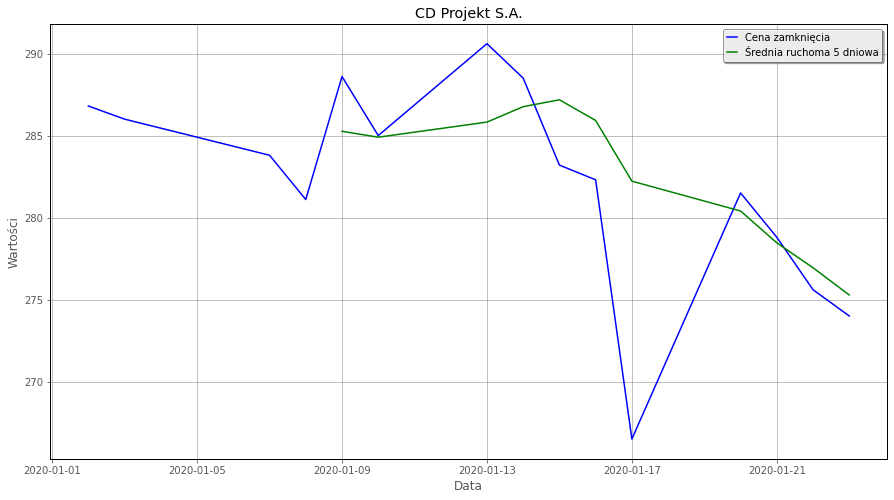

In [54]:
plt.figure(figsize=(15,8))
plt.plot(CD_Projekt_First15Days2k20['Close'], color = 'blue',label = 'Cena zamknięcia')
plt.plot(CD_Projekt_First15Days2k20['Close'].rolling(5).mean(), color = 'green', label = 'Średnia ruchoma 5 dniowa')
plt.grid()
plt.xlabel('Data')
plt.ylabel('Wartości')
plt.title('CD Projekt S.A.')
plt.legend()

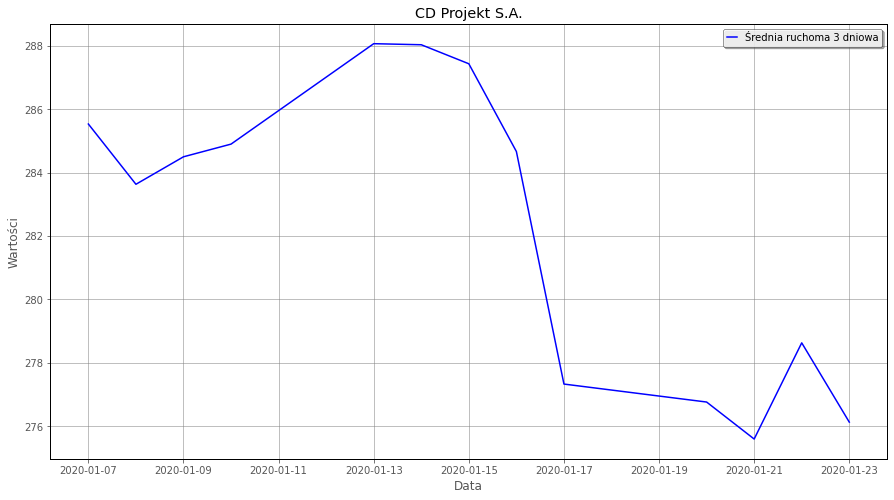

In [63]:
CD_Projekt_First15Days2k20['Mean'] = CD_Projekt_First15Days2k20['Close'].rolling(3).mean()
CD_Projekt_First15Days2k20
plt.figure(figsize=(15,8))
plt.plot(CD_Projekt_First15Days2k20['Mean'], color = 'blue', label = 'Średnia ruchoma 3 dniowa')
plt.grid()
plt.xlabel('Data')
plt.ylabel('Wartości')
plt.title('CD Projekt S.A.')
plt.legend()

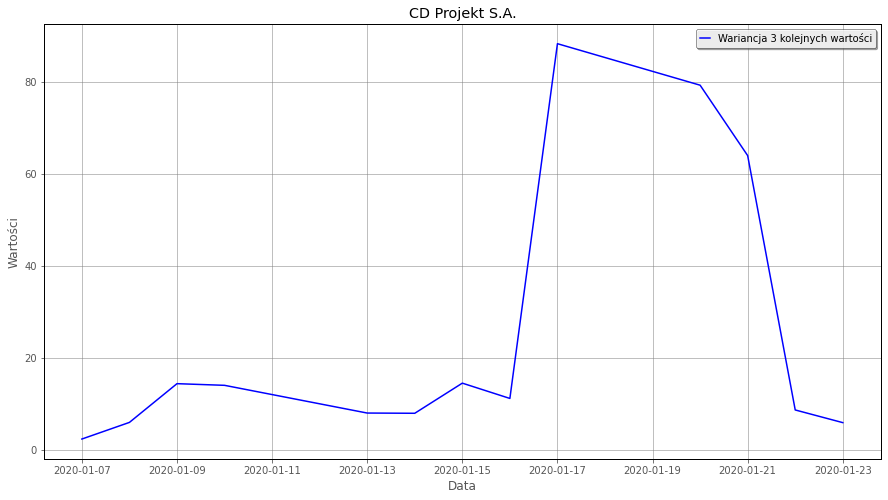

In [65]:
CD_Projekt_First15Days2k20['Variance'] = CD_Projekt_First15Days2k20['Close'].rolling(3).var()
CD_Projekt_First15Days2k20
plt.figure(figsize=(15,8))
plt.plot(CD_Projekt_First15Days2k20['Variance'], color = 'blue', label = 'Wariancja 3 kolejnych wartości')
plt.grid()
plt.xlabel('Data')
plt.ylabel('Wartości')
plt.title('CD Projekt S.A.')
plt.legend()

Coefficients: 
 [-0.90892857]


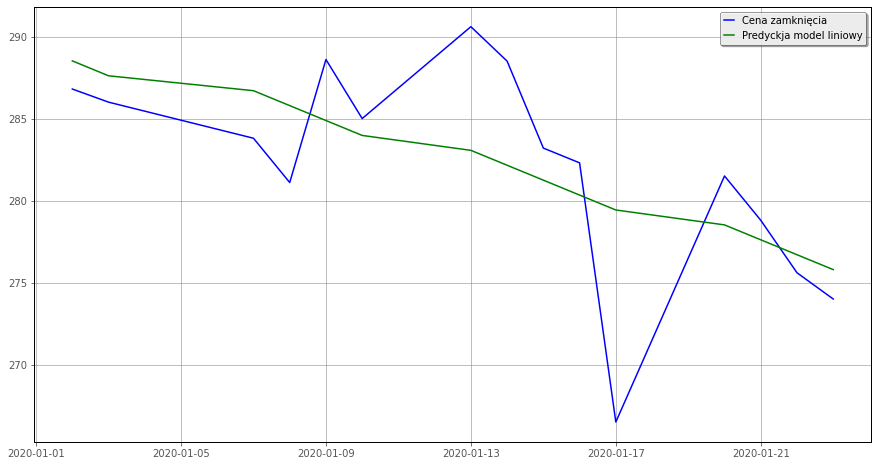

In [120]:
import numpy as np
from sklearn import datasets, linear_model
#########
y = CD_Projekt_First15Days2k20['Close'].values
X = (CD_Projekt_First15Days2k20.reset_index().index.values+1).reshape(-1,1)
#########
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X, y)
# Predict values
Y_predicted = regr.predict(X)
# Plot
CD_Projekt_First15Days2k20['Linear_predict'] = Y_predicted
plt.figure(figsize=(15,8))
plt.plot(CD_Projekt_First15Days2k20['Close'], color = 'blue', label ='Cena zamknięcia')
plt.plot(CD_Projekt_First15Days2k20['Linear_predict'], color = 'green',label = 'Predyckja model liniowy')
plt.grid()
plt.legend()
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error

In [118]:
Y

NameError: ignored

In [82]:
CD_Projekt_First15Days2k20['Close'].values.reshape(-1,1)

array([[286.8],
       [286. ],
       [283.8],
       [281.1],
       [288.6],
       [285. ],
       [290.6],
       [288.5],
       [283.2],
       [282.3],
       [266.5],
       [281.5],
       [278.8],
       [275.6],
       [274. ]])

In [83]:
y

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])